In [18]:
#import basic libraries
from sklearn.model_selection import train_test_split
import numpy as np

# Function to implement KNN for any value of k(part of extra question)

In [19]:
#KNN function for a generalized value of k
def KNN(X_train,y_train,X_test,k):
    #list to store distances and labels
    dist = []
    labels = []
    #calculate and store distance in a list along with index
    for i in range(len(X_train)):
        dist.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    dist = sorted(dist)
    #get labels of the k nearest neighbours
    for i in range(k):
        labels.append(y_train[dist[i][1]])

    #return most common label
    return max(set(labels), key = labels.count)

# Iris data set prediction

In [20]:
#load Iris data set using scikit-learn library
from sklearn.datasets import load_iris
iris = load_iris()

#spit data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'], random_state=1210) #bday passed in DDMM format for random_state parameter

In [21]:
#run KNN on test samples for k=1
y_pred = []
k=1     #value of k for knn
for i in range(len(X_test)):
    y_pred.append(KNN(X_train, y_train, X_test[i, :], k))

#compute test errors and error rate
errors=0
for i in range(0,len(y_pred)):
    if y_pred[i]!=y_test[i]:
        errors+=1
print('For k =',k)
print('Total errors: ',errors)
print('Error rate: ',errors/len(y_pred))

For k = 1
Total errors:  2
Error rate:  0.05263157894736842


In [22]:
#run KNN on test samples for k=3
y_pred = []
k=3     #value of k for knn
for i in range(len(X_test)):
    y_pred.append(KNN(X_train, y_train, X_test[i, :], k))

#compute test errors and error rate
errors=0
for i in range(0,len(y_pred)):
    if y_pred[i]!=y_test[i]:
        errors+=1
print('For k =',k)
print('Total errors: ',errors)
print('Error rate: ',errors/len(y_pred))

For k = 3
Total errors:  1
Error rate:  0.02631578947368421


# Extra question
# Calculate the optimized value of k to get the least error rate

In [23]:
#calculate the best value of k so as to minimize test error rate
import time
t=time.time()

k_list=np.arange(1,51)
errorRate_list=[]

#trying the k-nn algorithm for values 1 to 50
for k in k_list:
    pred=[]
    for i in range(len(X_test)):
        pred.append(KNN(X_train, y_train, X_test[i, :], k))
    errors=0
    for i in range(0,len(pred)):
        if pred[i]!=y_test[i]:
            errors+=1
    errorRate=errors/(len(pred))
    errorRate_list.append(errorRate)

#initialize list to store best k-values
best_k_val=[]
leastVal=min(errorRate_list)

for i in range(0,len(errorRate_list)):
    if errorRate_list[i]==leastVal:
        best_k_val.append(i+1)
print("The values of k with least error rate i.e. %.3f are: " %leastVal)
print(best_k_val)
print("Time taken to execute this simulation: "+str(time.time()-t)+"s")

The values of k with least error rate i.e. 0.026 are: 
[3, 4, 5, 6]
Time taken to execute this simulation: 1.5595781803131104s


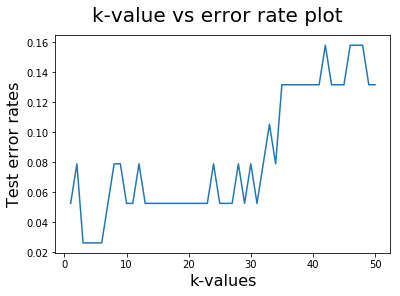

In [24]:
#k-value v error rate plot
from matplotlib import pyplot as plt
plt.xlabel("k-values",fontsize=16)
plt.ylabel("Test error rates",fontsize=16)
plt.suptitle('k-value vs error rate plot',fontsize=20)
plt.plot(k_list,errorRate_list)

In [25]:
print("The above plot validates our result above that the values 3,4,5 and 6 are the values for which the error rates are the least.")

The above plot validates our result above that the values 3,4,5 and 6 are the values for which the error rates are the least.


# Ionosphere data set prediction

In [26]:
#get all 34 independent variables to X
X = np.genfromtxt("ionosphere.txt", delimiter=",",usecols=np.arange(34))
#get target variable(column index 34) to y
y = np.genfromtxt("ionosphere.txt", delimiter=",",usecols=34, dtype='int')

#spit data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1210) #bday passed in DDMM format for random_state parameter

In [27]:
#run KNN on test samples for k=1
y_pred = []
k=1     #value of k for knn
for i in range(len(X_test)):
    y_pred.append(KNN(X_train, y_train, X_test[i, :], k))

#compute test errors and error rate
errors=0
for i in range(0,len(y_pred)):
    if y_pred[i]!=y_test[i]:
        errors+=1
print('For k =',k)
print('Total errors: ',errors)
print('Error rate: ',errors/len(y_pred))

For k = 1
Total errors:  11
Error rate:  0.125


In [28]:
#run KNN on test samples for k=3
y_pred = []
k=3     #value of k for knn
for i in range(len(X_test)):
    y_pred.append(KNN(X_train, y_train, X_test[i, :], k))

#compute test errors and error rate
errors=0
for i in range(0,len(y_pred)):
    if y_pred[i]!=y_test[i]:
        errors+=1
print('For k =',k)
print('Total errors: ',errors)
print('Error rate: ',errors/len(y_pred))

For k = 3
Total errors:  13
Error rate:  0.14772727272727273


# Extra question
# Calculate the optimized value of k to get the least error rate

In [29]:
#calculate the best value of k so as to minimize test error rate
t=time.time()

k_list=np.arange(1,51)
errorRate_list=[]

#trying the k-nn algorithm for values 1 to 50
for k in k_list:
    pred=[]
    for i in range(len(X_test)):
        pred.append(KNN(X_train, y_train, X_test[i, :], k))
    errors=0
    for i in range(0,len(pred)):
        if pred[i]!=y_test[i]:
            errors+=1
    errorRate=errors/(len(pred))
    errorRate_list.append(errorRate)

#initialize list to store best k-values
best_k_val=[]
leastVal=min(errorRate_list)

for i in range(0,len(errorRate_list)):
    if errorRate_list[i]==leastVal:
        best_k_val.append(i+1)
print("The values of k with least error rate i.e. %.3f are: " %leastVal)
print(best_k_val)
print("Time taken to execute this simulation: "+str(time.time()-t)+"s")

The values of k with least error rate i.e. 0.125 are: 
[1]
Time taken to execute this simulation: 8.212007761001587s


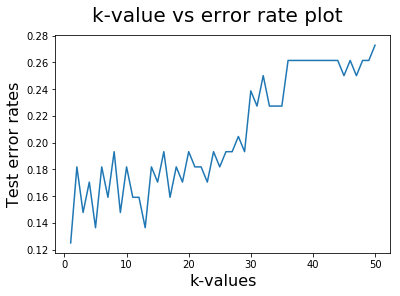

In [30]:
#k-value v error rate plot
plt.xlabel("k-values",fontsize=16)
plt.ylabel("Test error rates",fontsize=16)
plt.suptitle('k-value vs error rate plot',fontsize=20)
plt.plot(k_list,errorRate_list)

In [32]:
print("The plot validates our result above that for k=1, the error rate is the least.")

The plot validates our result above that for k=1, the error rate is the least.
